In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skp


In [42]:
import os

print (os.path.exists("Data_several_features_5_year.xlsx") and False)

dfData = pd.read_excel("Data_several_features_5_year.xlsx")
dfTarget = pd.read_excel("target_data_5_years.xlsx")
dfYear99 = pd.read_excel("temperature_1999.xlsx")

False


In [43]:
import datetime

dt = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2005, 1, 1)
step = datetime.timedelta(days=1)

# print(dt.isocalendar()[1])

result = []

yearArray = []
monthArray = []
dayArray = []
weekNumberArray = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    yearArray.append(dt.year)
    monthArray.append(dt.month)
    dayArray.append(dt.day)
    weekNumberArray.append(dt.isocalendar()[1])
    dt += step

    

# print (dfData.shape)
# print (dfTarget.shape)

# >>>>>>>>>>
#TODO:
# figure out correct days
# normalize data


sun_rain = np.array(dfData.as_matrix())
target = np.squeeze(np.asarray(dfTarget.as_matrix()))
year99 = np.squeeze(np.asarray(dfYear99.as_matrix()))

year = (np.array(yearArray))
month = (np.array(monthArray))
day = np.array(dayArray)
week = np.array(weekNumberArray)


# print (np.repeat(np.array([1,2,3,4]), 457))



all_data = np.column_stack((sun_rain.transpose()[0], sun_rain.transpose()[1], target))

all_data = skp.normalize(all_data)

# print (all_data)



# all_data = np.column_stack((all_data.transpose()[0], all_data.transpose()[1], year, month, day, week))

# sun_rain = np.column_stack((all_data.transpose()[0],all_data.transpose()[1]))

print (all_data.transpose()[2])

print (target.shape)

data = np.column_stack((sun_rain.transpose()[0], sun_rain.transpose()[1], year, month, day, week))

# print (data)

print (data.shape)


# data.transpose()

# print (data)
# print (target)

[ 0.99995378  0.86726095  0.53127515 ...,  0.99589321  0.99130435  1.        ]
(1827,)
(1827, 6)


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/axel/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


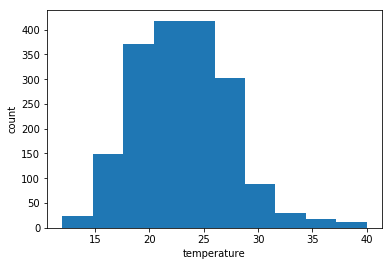

In [7]:
plt.hist(target)
plt.xlabel('temperature')
plt.ylabel('count')

In [8]:
from sklearn.model_selection import train_test_split



# X_train_one_feature, X_test_one_feature, y_train_one_feature, y_test_one_feature = train_test_split(data_one_feature, target)

X_train, X_test, y_train, y_test = train_test_split(data, target)


print(len(y_train))

1370


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from statsmodels.tsa.ar_model import ARResults

# Instantiate the model, fit the results, and scatter in vs. out

# clf_one_feature = LinearRegression()
# clf_one_feature.fit(X_train_one_feature, y_train_one_feature)

# linear regression

clfL = LinearRegression()

clfL.fit(X_train, y_train)

coef = clfL.score(X_train, y_train)

print (coef)

clfL.coef_

# GradientBoostingRegressor

clfG = GradientBoostingRegressor()

clfG.fit(X_train, y_train)

coef = clfG.score(X_train, y_train)

print (coef)

# Support Vector Machine

clfS = svm.SVR()

clfS.fit(X_train, y_train)

coef = clfS.score(X_train, y_train)

print (coef)



/home/axel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.285210153657
0.696384287318
0.501271410842


In [10]:
# predicted_one_feature = clf_one_feature.predict(X_test_one_feature)

predictedL = clfL.predict(X_test)

predictedG = clfG.predict(X_test)

predictedS = clfS.predict(X_test)

print(len(predictedL))

457


[[ 1.          0.53611787]
 [ 0.53611787  1.        ]]
457
457


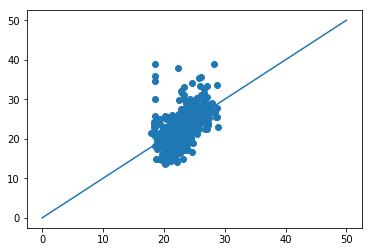

In [11]:
# Linear regression

plt.scatter(predictedL, y_test)
plt.plot([0, 50], [0, 50])

print (np.corrcoef(predictedL, y_test))

print (len(predictedL))

print (len(y_test))

[[ 1.          0.78140547]
 [ 0.78140547  1.        ]]
457
457


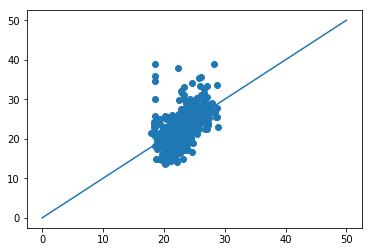

In [13]:
# Gradient booster regressor

plt.scatter(predictedL, y_test)
plt.plot([0, 50], [0, 50])

print (np.corrcoef(predictedG, y_test))
print (len(predictedL))

print (len(y_test))

[[ 1.          0.58117938]
 [ 0.58117938  1.        ]]
457
457


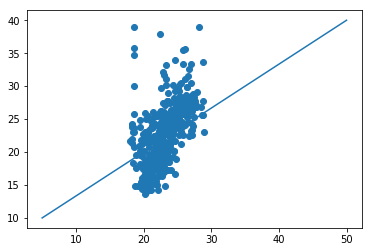

In [14]:
# Support Vector Machine

plt.scatter(predictedL, y_test)
plt.plot([5, 50], [10, 40])

print (np.corrcoef(predictedS, y_test))

print (len(predictedL))

print (len(y_test))

In [15]:
457-366

91

In [16]:
365-91 # 1 Oct

274

In [17]:
Oct = predictedS[0:29]
print(len(Oct))
Nov = predictedS[29:59]
print(len(Nov))
print (np.mean(Nov))
Dec = predictedS[59:90]
print(len(Dec))
print (np.mean(Dec))
Jan = predictedS[90:121]
print(len(Jan))
print (np.mean(Jan))
Feb = predictedS[121:150]
print(len(Feb))
print (np.mean(Feb))
Mar = predictedS[150:181]
print(len(Mar))
print (np.mean(Mar))
Apr = predictedS[181:211]
print(len(Apr))
print (np.mean(Apr))
May = predictedS[211:242]
print(len(May))
print (np.mean(May))
Jun = predictedS[242:272]
print(len(Jun))
print (np.mean(Jun))
Jul = predictedS[272:303]
print(len(Jul))
print (np.mean(Jul))
Aug = predictedS[303:334]
print(len(Aug))
print (np.mean(Aug))
Sep = predictedS[334:365]
print(len(Sep))
print (np.mean(Sep))
Oct2 = predictedS[365:396]
print(len(Oct2))
print (np.mean(Oct2))
Nov2 = predictedS[396:426]
print(len(Nov2))
print (np.mean(Nov2))
Dec2 = predictedS[426:]
print(len(Dec2))
print (np.mean(Dec2))



29
30
22.5929068442
31
22.2855028711
31
22.909098899
29
23.4841930717
31
23.1212361858
30
22.9817384721
31
23.3471218576
30
23.3655180281
31
22.9424504077
31
22.9810198054
31
22.9234529886
31
22.7586110812
30
22.8310511051
31
23.1481379727


In [18]:
[np.mean(Nov), np.mean(Dec), np.mean(Jan), np.mean(Feb), np.mean(Mar), np.mean(Apr), np.mean(May), np.mean(Jun), np.mean(Jul), np.mean(Aug), np.mean(Sep), np.mean(Oct2), np.mean(Nov2), np.mean(Dec2)]

[22.592906844232861,
 22.285502871109905,
 22.909098898998071,
 23.484193071720824,
 23.121236185816016,
 22.981738472064002,
 23.347121857644868,
 23.365518028072703,
 22.942450407724394,
 22.981019805417255,
 22.923452988647522,
 22.758611081179087,
 22.831051105114675,
 23.148137972747666]

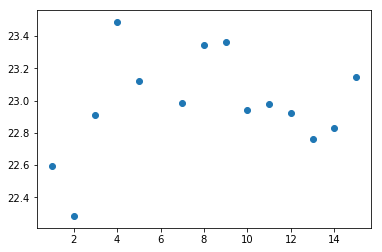

In [19]:
plt.scatter([1,2,3,4,5,7,8,9,10,11,12,13,14,15], [np.mean(Nov), np.mean(Dec), np.mean(Jan), np.mean(Feb), np.mean(Mar), np.mean(Apr), np.mean(May), np.mean(Jun), np.mean(Jul), np.mean(Aug), np.mean(Sep), np.mean(Oct2), np.mean(Nov2), np.mean(Dec2)])

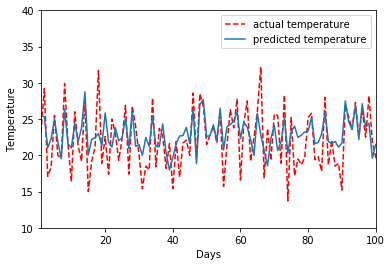

In [21]:
# Linear regression

days = np.arange(1,458)
plt.plot(days, y_test, 'r--',label="actual temperature")
plt.plot(days, predictedL, label="predicted temperature")
plt.axis([1,100, 10,40])
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")

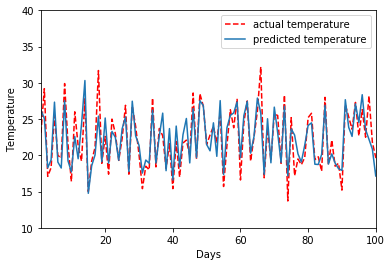

In [102]:
# GradientBoostingRegressor

days = np.arange(1,458)
plt.plot(days, y_test, 'r--',label="actual temperature")
plt.plot(days, predictedG, label="predicted temperature")
plt.axis([1,100, 10,40])
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")

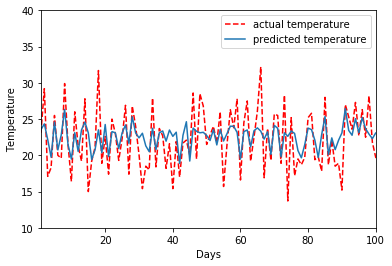

In [23]:
# Support Vector Machine

days = np.arange(1,458)
plt.plot(days, y_test, 'r--',label="actual temperature")
plt.plot(days, predictedS, label="predicted temperature")
plt.axis([1,100, 10,40])
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")

In [24]:
def averageYear(year):
    monthdays = [31,29,31,30,31,30,31,31,30,31,30,31]
    average = []
    index = 0
    i = 0
    j = 0
    while index < 12:
        j += monthdays[index]
        average.append(np.average(year[i:j]))    
        i = j
        index += 1
    return average

# print (averageYear(predictedL[457-366:]))

Linear Regression


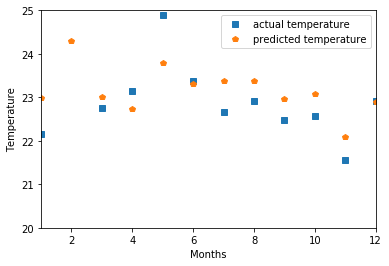

In [25]:
months = np.arange(1,13)

predictedAverage = averageYear(predictedL[457-366:])
actualAverage = averageYear(y_test[457-366:])

# print(actualAverage)
# print(predictedAverage)

plt.plot(months, actualAverage, 's',label="actual temperature")
plt.plot(months, predictedAverage,'p', label="predicted temperature")
plt.axis([1,12, 20,25])
plt.legend()
plt.xlabel("Months")
plt.ylabel("Temperature")

print ("Linear Regression")

GradientBoostingRegressor


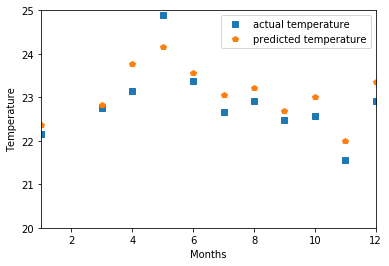

In [26]:
months = np.arange(1,13)

predictedAverage = averageYear(predictedG[457-366:])
actualAverage = averageYear(y_test[457-366:])

# print(actualAverage)
# print(predictedAverage)

plt.plot(months, actualAverage, 's',label="actual temperature")
plt.plot(months, predictedAverage,'p', label="predicted temperature")
plt.axis([1,12, 20,25])
plt.legend()
plt.xlabel("Months")
plt.ylabel("Temperature")

print ("GradientBoostingRegressor")

Support Vector Machine


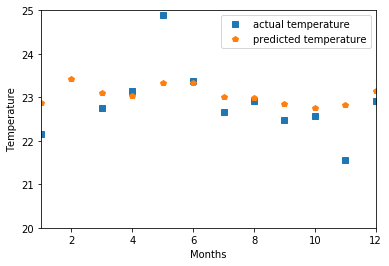

In [27]:
months = np.arange(1,13)

predictedAverage = averageYear(predictedS[457-366:])
actualAverage = averageYear(y_test[457-366:])

# print(actualAverage)
# print(predictedAverage)

plt.plot(months, actualAverage, 's',label="actual temperature")
plt.plot(months, predictedAverage,'p', label="predicted temperature")
plt.axis([1,12, 20,25])

plt.legend()
plt.xlabel("Months")
plt.ylabel("Temperature")

print("Support Vector Machine")

In [29]:
print(np.var(y_test))
print(np.var(predictedL))
print(np.var(predictedS))
print(np.var(predictedG))

19.6067835613
5.30751516849
2.11258125129
12.3524334853


In [30]:


def largestDiff(a1, a2):
    i = 0
    diff = 0
    while(i < len(a1)):
        tmp = abs(a1[i] - a2[i])
        if(tmp > diff):
            diff = tmp
        i +=1
    return diff

    

In [31]:
print(largestDiff(y_test, predictedL))
print(largestDiff(y_test, predictedS))
print(largestDiff(y_test, predictedG))

20.3345884971
15.0337789899
13.0768972354


In [32]:
print(clfL.score(X_test, y_test))
print(clfS.score(X_test, y_test))
print(clfG.score(X_test, y_test))
clfL.score??

0.283966647872
0.273310303515
0.608623288461


In [93]:
monthdays = [31,28,31,30,31,30,31,31,30,31,30,31]

naive_predictions = []

for element in X_test:
    if(element[3] == 1):
        index = element[4] - 1
    else:
        index = (np.sum(monthdays[:int(element[3])-1])+element[4]) - 1

    if(element[2] == 2000):
        temperature = float("{0:.2f}".format(year99[int(index)]))
        
    elif(element[2] == 2001 and element[3] <= 2 and element[4] < 29):
        temperature = float("{0:.2f}".format(target[int(index)]))
        
    elif(element[2] == 2001 and element[3] > 2 or (element[3] == 2 and element[4] == 29)): #addition due to leap year
        temperature = float("{0:.2f}".format(target[int(index) + 1]))
        
    elif(element[2] == 2002):
        temperature = float("{0:.2f}".format(target[int(index) + 366]))
    
    elif(element[2] == 2003):
        temperature = float("{0:.2f}".format(target[int(index) + 366 + 365]))
    
    elif(element[2] == 2004):
        temperature = float("{0:.2f}".format(target[int(index)+ 366 + 365 * 2]))
        
    naive_predictions.append(temperature)

np_naive_predictions = np.array(naive_predictions)
print (np_naive_predictions.shape)
print (np_naive_predictions)

(457,)
[ 28.5  22.3  18.5  17.6  29.7  18.6  18.2  26.7  18.4  18.7  25.7  16.9
  17.8  26.7  16.   17.   18.8  30.7  16.8  25.1  18.9  28.6  28.2  17.6
  20.1  26.5  17.2  30.9  24.3  21.2  20.6  23.6  16.7  25.4  18.   27.4
  19.3  19.5  23.8  19.   25.6  18.5  25.5  24.6  17.   26.8  21.8  25.3
  27.7  20.7  15.   17.6  17.1  20.8  21.2  21.4  22.1  23.2  25.7  17.4
  23.3  21.9  19.6  27.   23.1  28.2  18.3  20.4  15.3  26.6  24.   18.1
  25.3  18.5  25.7  18.3  23.9  16.5  14.9  23.4  25.   16.8  15.2  24.9
  26.4  16.7  21.   17.9  17.6  20.5  28.5  24.5  20.4  27.1  31.5  21.6
  20.9  20.6  17.7  17.7  27.4  16.7  24.7  28.4  36.2  27.3  21.2  25.8
  21.9  14.6  18.   20.8  21.3  23.8  24.5  23.8  26.1  15.3  17.8  22.4
  15.7  21.   20.1  28.7  27.5  21.5  24.   14.3  26.4  28.5  27.4  25.4
  16.6  26.5  32.7  19.3  23.2  27.   23.2  27.9  21.3  26.2  22.8  26.5
  27.4  22.   22.8  34.   25.9  27.3  22.5  17.   15.9  21.2  29.2  19.9
  26.5  29.2  32.4  17.3  18.1  25.6  24.3  

In [95]:
# print ((y_test[457-366:]).reshape(366,1))

resultsMatrix = np.transpose(np.matrix([np_naive_predictions[457-366:], predictedL[457-366:], predictedG[457-366:], predictedS[457-366:]]))

dfResults = pd.DataFrame(resultsMatrix)

dfResults.to_excel(pd.ExcelWriter("results_adjusted_naive-predictions.xlsx"))

# print(y_test[457-366:])



In [100]:
# print ((y_test[457-366:]).reshape(366,1))

resultsMatrix = np.transpose(np.matrix([y_test[457-366:], predictedL[457-366:], predictedG[457-366:], predictedS[457-366:], np_naive_predictions[457-366:]]))

dfResults = pd.DataFrame(resultsMatrix)

dfResults.to_excel(pd.ExcelWriter("prediction_results.xlsx"))

# print(y_test[457-366:])

